# CAPSTONE PROJECT NOTEBOOK
___
Title
## More than Walls: Choosing a place to call home
___

### I start by downloading and importing the libraries i will need for this assignment

In [1]:

import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Request library to handle requests
import requests 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib library and associated relevant modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from SciKitLearn
from sklearn.cluster import KMeans

# Import XML for webfiles
import xml

# Import BeautifulSoup web scraping import Beautiful Soup 
from bs4 import BeautifulSoup

# Install Folium, Json and GeoPy for Json files, maps and visualization
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import json 
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values



print('All the needed Libraries successfully imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

All the needed Libraries successfully imported.


## Importing the data
The data imported is a demographic data from the City of Edmonton. We import the data from city's website and wrangle. 

Data sources 

https://data.edmonton.ca/Census/2016-Census-Population-by-Age-Range-Neighbourhood-/phd4-y42v

https://data.edmonton.ca/City-Administration/City-of-Edmonton-Neighbourhoods-Centroid-Point-/3b6m-fezs

In [2]:
Edm_df = pd.read_csv ("2016_Census_-_Population_by_Age_Range__Neighbourhood_Ward_.csv")
Edm_df.drop('Ward', axis=1, inplace=True)
Edm_df['Population']=Edm_df.iloc[:,2:].sum(axis=1)
Edm_df.drop(Edm_df.iloc[:,2:21], axis=1, inplace=True)
print(Edm_df.shape)

# Preview the first 5 colums
Edm_df.head()

(388, 3)


,Neighbourhood Number,Neighbourhood Name,Population
0,3140,CRESTWOOD,2351
1,3330,PARKVIEW,3285
2,6110,CPR IRVINE,166
3,5350,RHATIGAN RIDGE,3077
4,4140,ELMWOOD,2721


In [3]:
Edm_loc = pd.read_csv('City_of_Edmonton_-_Neighbourhoods__Centroid_Point_.csv')
print(Edm_loc.shape)

# Preview the first 5 colums
Edm_loc.head()

(401, 6)


,Neighbourhood Number,Neighbourhood Name,Area Sq Km,Latitude,Longitude,Location
0,4150,Gagnon Estate Industrial,0.556701,53.580184,-113.585795,"(53.58018417365767, -113.58579493909596)"
1,6390,Larkspur,1.658195,53.480210,-113.381240,"(53.4802104573005, -113.38123994870551)"
2,4440,River Valley Lessard North,0.794190,53.504195,-113.584827,"(53.504195315820766, -113.58482693803155)"
3,2462,Crystallina Nera East,0.858689,53.640784,-113.448768,"(53.64078411972238, -113.44876804405544)"
4,5060,Blue Quill,1.058050,53.457627,-113.526237,"(53.45762652276185, -113.52623651519588)"


In [4]:
Edm_crime = pd.read_csv('EPS_Neighbourhood_Criminal_Occurrences.csv')
Edm_crime.drop(Edm_crime.iloc[:,1:5], axis=1, inplace=True)
Edm_crime = Edm_crime.groupby('Neighbourhood Description (Occurrence)').sum()
Edm_crime.rename(columns={'Neighbourhood Description (Occurrence)':'Neighbourhood Name_x'})
Edm_crime.reset_index(inplace=True) 
print(Edm_crime.shape)

# Preview the first 5 colums
Edm_crime.head()

(393, 2)


,Neighbourhood Description (Occurrence),# Occurrences
0,ABBOTTSFIELD,976
1,ALBANY,221
2,ALBERTA AVENUE,5048
3,ALBERTA PARK INDUSTRIAL,260
4,ALDERGROVE,937


In [5]:
# Here, i save the Crime data into a CSV and edit the names of the Neighbourhood in Excel 
# in a format that matches the names of neighbourhoods in Census data

Edm_crime.to_csv('Edm_crime.csv', index=False)

In [6]:
# I import the new data as Edm_crime2, with another column 'Neighbourhood Name_y' which i will use
Edm_crime2 = pd.read_csv('Edm_crime2A.csv')
print(Edm_crime2.shape)

# Preview the first 5 colums
Edm_crime2.head()

(393, 3)


,Neighbourhood Description (Occurrence),Neighbourhood Name_y,# Occurrences
0,ABBOTTSFIELD,Abbottsfield,976
1,ALBANY,Albany,221
2,ALBERTA AVENUE,Alberta Avenue,5048
3,ALBERTA PARK INDUSTRIAL,Alberta Park Industrial,260
4,ALDERGROVE,Aldergrove,937


In [7]:
Edm_crime2.head()

,Neighbourhood Description (Occurrence),Neighbourhood Name_y,# Occurrences
0,ABBOTTSFIELD,Abbottsfield,976
1,ALBANY,Albany,221
2,ALBERTA AVENUE,Alberta Avenue,5048
3,ALBERTA PARK INDUSTRIAL,Alberta Park Industrial,260
4,ALDERGROVE,Aldergrove,937


In [8]:
# Now i merge the Edm_df and EDM_loc data frames using the common variable 'Neighbourhood Number'
# and rename it as Ed
Ed = pd.merge(Edm_df, Edm_loc, on = 'Neighbourhood Number')
print(Ed.shape)

# Preview the first 5 colums
Ed.head()

(382, 8)


,Neighbourhood Number,Neighbourhood Name_x,Population,Neighbourhood Name_y,Area Sq Km,Latitude,Longitude,Location
0,3140,CRESTWOOD,2351,Crestwood,1.168158,53.535434,-113.569038,"(53.53543354829023, -113.56903784940349)"
1,3330,PARKVIEW,3285,Parkview,1.546448,53.524060,-113.567914,"(53.524060365765735, -113.56791414354251)"
2,6110,CPR IRVINE,166,CPR Irvine,0.663610,53.507527,-113.490549,"(53.50752668934572, -113.4905491361979)"
3,5350,RHATIGAN RIDGE,3077,Rhatigan Ridge,1.344078,53.474506,-113.587569,"(53.474506145469945, -113.5875691214093)"
4,4140,ELMWOOD,2721,Elmwood,1.025925,53.515738,-113.605993,"(53.515738255461834, -113.60599332906781)"


In [9]:
# Now the new data frame 'Ed', i merge the crime occurence dataframe 'Edm_crime2' using
# the common variable 'Neighbourhood Name_y' and call the new data fram 'Edm_merge'

Edm_merge = pd.merge(Ed, Edm_crime2, on='Neighbourhood Name_y')

In [10]:
# Now i go ahead to generate a varible called 'Population Density' with the new data frame

Edm_merge['Population density'] = Edm_merge['Population']/Edm_merge['Area Sq Km']

In [11]:
# I go ahead to rename some of the variables to for easier recognition, and work a bit on the data frame

Edm_merge.rename(columns={'Neighbourhood Name_y':'Neighbourhood', '# Occurrences':'Crime Frequency'}, inplace=True)
first_column = Edm_merge.pop('Neighbourhood')
Edm_merge.insert(0, 'Neighbourhood',first_column)
print(Edm_merge.shape)

# Preview the first 5 colums
Edm_merge.head()

(365, 11)


,Neighbourhood,Neighbourhood Number,Neighbourhood Name_x,Population,Area Sq Km,Latitude,Longitude,Location,Neighbourhood Description (Occurrence),Crime Frequency,Population density
0,Crestwood,3140,CRESTWOOD,2351,1.168158,53.535434,-113.569038,"(53.53543354829023, -113.56903784940349)",CRESTWOOD,566,2012.570511
1,Parkview,3330,PARKVIEW,3285,1.546448,53.524060,-113.567914,"(53.524060365765735, -113.56791414354251)",PARKVIEW,564,2124.222397
2,Rhatigan Ridge,5350,RHATIGAN RIDGE,3077,1.344078,53.474506,-113.587569,"(53.474506145469945, -113.5875691214093)",RHATIGAN RIDGE,194,2289.302486
3,Elmwood,4140,ELMWOOD,2721,1.025925,53.515738,-113.605993,"(53.515738255461834, -113.60599332906781)",ELMWOOD,426,2652.240173
4,Kenilworth,6350,KENILWORTH,2553,1.148418,53.521633,-113.431042,"(53.52163312280284, -113.43104243959984)",KENILWORTH,690,2223.058958


### Now the new 'Edm_merge' data frame i have has 11 variables. However, i only need a few of them for my analysis, namely Neighborhood, Latitude, Longitude, Crime Frequency, and Population density

In [12]:
# Thus i will go ahead and drop the other variables i do not need from the data frame

Edm_merge.drop(Edm_merge[['Location','Neighbourhood Description (Occurrence)', 'Neighbourhood Name_x', 
                        'Neighbourhood Number', 'Population','Area Sq Km']], 
              axis=1, inplace=True)
print(Edm_merge.shape)

# Preview the first 5 colums
Edm_merge.head()

(365, 5)


,Neighbourhood,Latitude,Longitude,Crime Frequency,Population density
0,Crestwood,53.535434,-113.569038,566,2012.570511
1,Parkview,53.524060,-113.567914,564,2124.222397
2,Rhatigan Ridge,53.474506,-113.587569,194,2289.302486
3,Elmwood,53.515738,-113.605993,426,2652.240173
4,Kenilworth,53.521633,-113.431042,690,2223.058958


In [13]:
# I did the step below to replace any missing crime frequency values with the average

avg_crime_freq = Edm_merge['Crime Frequency'].astype('float').mean(axis=0)
Edm_merge['Crime Frequency'].replace(0, avg_crime_freq, inplace=True)

In [14]:
# For this analysis, i will need only the neighbourhoods with population density greater than the mean.

avg_pop_density = Edm_merge['Population density'].astype('float').mean(axis=0)
Edm_merge = Edm_merge.drop(Edm_merge[Edm_merge['Population density'] < avg_pop_density].index)
Edm_merge.reset_index(inplace=True) 



In [15]:
# Preview the first 5 colums

print(Edm_merge.shape)
Edm_merge.head()

(208, 6)


,index,Neighbourhood,Latitude,Longitude,Crime Frequency,Population density
0,0,Crestwood,53.535434,-113.569038,566,2012.570511
1,1,Parkview,53.524060,-113.567914,564,2124.222397
2,2,Rhatigan Ridge,53.474506,-113.587569,194,2289.302486
3,3,Elmwood,53.515738,-113.605993,426,2652.240173
4,4,Kenilworth,53.521633,-113.431042,690,2223.058958


In [16]:
# I drop the index variable to keep the data in the shape i want it to be

Edm_merge.drop(Edm_merge[['index']], axis=1, inplace=True)
print(Edm_merge.shape)

# Preview the first 5 colums
Edm_merge.head()

(208, 5)


,Neighbourhood,Latitude,Longitude,Crime Frequency,Population density
0,Crestwood,53.535434,-113.569038,566,2012.570511
1,Parkview,53.524060,-113.567914,564,2124.222397
2,Rhatigan Ridge,53.474506,-113.587569,194,2289.302486
3,Elmwood,53.515738,-113.605993,426,2652.240173
4,Kenilworth,53.521633,-113.431042,690,2223.058958


In [17]:
# If i hadn't already downloaded and instalged geopy, will delete the '#' infront of the next line of code

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

In [18]:
address = 'Edmonton, CA'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of the City of Edmonton are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of the City of Edmonton are 53.535411, -113.507996.


In [19]:
# Generate the map of the City of Edmonton

map_Edmonton = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add markers to the generated map
for lat, lng, neighborhood in zip(Edm_merge['Latitude'], Edm_merge['Longitude'], Edm_merge['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Edmonton)  
    
map_Edmonton

In [20]:
CLIENT_ID = 'IQYARPTUE4BDLE1Y4CEW1PYMDL0WBTHBP3CJ4ICBR5W5JRZL'
CLIENT_SECRET = '4F1RTI1O3FJCBLLD42SYNDSQSJIBNARILM5O32DKUCWWCDC3'
VERSION = '20200701'

print('Your credentails: RA')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails: RA
CLIENT_ID: IQYARPTUE4BDLE1Y4CEW1PYMDL0WBTHBP3CJ4ICBR5W5JRZL
CLIENT_SECRET:4F1RTI1O3FJCBLLD42SYNDSQSJIBNARILM5O32DKUCWWCDC3


In [21]:
categoryid = "4d4b7105d754a06372d81259,52f2ab2ebcbc57f1066b8b46,4bf58dd8d48988d13d941735,\
52f2ab2ebcbc57f1066b8b4f,4bf58dd8d48988d1fc931735,4bf58dd8d48988d196941735,52e81612bcbc57f1066b7a26"

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000,limit=200,categoryId=categoryid):
    """This function generates a maximum of 200 venues within 10,000 radius of each neighbour.
    It uses the Foursquare API.
    """
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
Edmonton_venues = getNearbyVenues(names=Edm_merge['Neighbourhood'],
                                   latitudes=Edm_merge['Latitude'],
                                   longitudes=Edm_merge['Longitude']
                                  )

Crestwood
Parkview
Rhatigan Ridge
Elmwood
Kenilworth
Brintnell
Evergreen
Alberta Avenue
Crawford Plains
La Perle
Rundle Heights
Tawa
Westview Village
Downtown
Menisa
Overlanders
Thorncliff
Callingwood South
Richfield
Belvedere
Daly Grove
Queen Alexandra
Silver Berry
Lymburn
Blackmud Creek
Rosslyn
Delton
Elsinore
Highlands
Rutherford
Kernohan
Steinhauer
Weinlos
Carter Crest
Abbottsfield
Lee Ridge
Eastwood
Skyrattler
Westmount
Haddow
Ozerna
Aspen Gardens
Laurel
Klarvatten
Sweet Grass
Glengarry
Grovenor
Baturyn
Breckenridge Greens
Holyrood
Lorelei
Beverly Heights
North Glenora
Pollard Meadows
Calder
Hodgson
Avonmore
Bonnie Doon
Hollick-Kenyon
Ermineskin
Larkspur
Blue Quill Estates
Evansdale
Westwood
Mayfield
Matt Berry
Canon Ridge
Callingwood North
York
Oleskiw
Kirkness
Chambery
Dunluce
Mill Woods Town Centre
Bannerman
Lendrum Place
Sakaw
Lago Lindo
Royal Gardens
Ritchie
Athlone
Garneau
Fulton Place
Casselman
Pleasantview
Allendale
Beacon Heights
Sifton Park
Bergman
Northmount
Canora
Sher

In [25]:
# Categories are each venue's amenities

Categories=Edmonton_venues['Venue Category'].unique()
print(Categories)

['Grocery Store' 'Supermarket' 'Pharmacy' 'High School'
 'Light Rail Station' 'Hospital' 'Factory' 'Mini Golf' 'Big Box Store'
 'Recreation Center' 'College & University' 'University'
 'College Academic Building' 'General College & University'
 'College Technology Building' 'Medical School' 'Student Center'
 'College Classroom' 'Community College' 'College Administrative Building'
 'Trade School' 'College Science Building' 'College Arts Building'
 'College Library' 'College Lab' 'College Engineering Building'
 'College Quad' 'College Residence Hall' 'Train Station' 'Law School'
 'College Gym' 'College Bookstore' 'Fraternity House' 'Library'
 'College Hockey Rink' 'Medical Center' 'College Rec Center'
 'College Stadium' 'College Auditorium' 'Emergency Room']


In [26]:
# Save the neighbourhoods dataframe 'Edmonton_venues' into a CSV file

Edmonton_venues.to_csv('Edmonton Venues.csv', index=False)

In [27]:
# Use one hot encoding tog et the dumies
Edmonton_onehot = pd.get_dummies(Edmonton_venues[['Venue Category']], prefix="", prefix_sep="")

# Add 'Neighbourhood' varible back to dataframe
Edmonton_onehot['Neighbourhood'] = Edmonton_venues['Neighbourhood'] 

# Fix the 'Neighbourhood' varible to the first column of the dataframe
fixed_columns = [Edmonton_onehot.columns[-1]] + list(Edmonton_onehot.columns[:-1])
Edmonton_onehot = Edmonton_onehot[fixed_columns]
print(Edmonton_onehot.shape)
Edmonton_onehot.head()

(16419, 41)


,Neighbourhood,Big Box Store,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Bookstore,College Classroom,College Engineering Building,College Gym,College Hockey Rink,College Lab,College Library,College Quad,College Rec Center,College Residence Hall,College Science Building,College Stadium,College Technology Building,Community College,Emergency Room,Factory,Fraternity House,General College & University,Grocery Store,High School,Hospital,Law School,Library,Light Rail Station,Medical Center,Medical School,Mini Golf,Pharmacy,Recreation Center,Student Center,Supermarket,Trade School,Train Station,University
0,Crestwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Crestwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Crestwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Crestwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Crestwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [28]:
print(Edmonton_venues.shape)
Edmonton_venues.head()

(16419, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Crestwood,53.535434,-113.569038,IGA Andy's Valleyview,53.525746,-113.566761,Grocery Store
1,Crestwood,53.535434,-113.569038,Save-On-Foods,53.542695,-113.508737,Supermarket
2,Crestwood,53.535434,-113.569038,T&T Supermarket,53.523360,-113.623934,Supermarket
3,Crestwood,53.535434,-113.569038,Safeway Oliver,53.547432,-113.518189,Grocery Store
4,Crestwood,53.535434,-113.569038,Safeway Pharmacy Jasper Gates,53.539812,-113.580860,Pharmacy


In [29]:
Edmonton_grouped = Edmonton_onehot.groupby('Neighbourhood').mean().reset_index()
Edmonton_grouped

,Neighbourhood,Big Box Store,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Bookstore,College Classroom,College Engineering Building,College Gym,College Hockey Rink,College Lab,College Library,College Quad,College Rec Center,College Residence Hall,College Science Building,College Stadium,College Technology Building,Community College,Emergency Room,Factory,Fraternity House,General College & University,Grocery Store,High School,Hospital,Law School,Library,Light Rail Station,Medical Center,Medical School,Mini Golf,Pharmacy,Recreation Center,Student Center,Supermarket,Trade School,Train Station,University
0,Abbottsfield,0.057971,0.014493,0.014493,0.028986,0.000000,0.000000,0.000000,0.014493,0.014493,0.014493,0.014493,0.028986,0.000000,0.000000,0.014493,0.014493,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.014493,0.159420,0.101449,0.057971,0.000000,0.000000,0.072464,0.014493,0.014493,0.000000,0.043478,0.028986,0.043478,0.086957,0.043478,0.014493,0.028986
1,Alberta Avenue,0.050000,0.020000,0.070000,0.040000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.020000,0.010000,0.000000,0.030000,0.010000,0.000000,0.010000,0.030000,0.000000,0.010000,0.000000,0.010000,0.140000,0.070000,0.070000,0.000000,0.010000,0.080000,0.000000,0.020000,0.000000,0.040000,0.020000,0.060000,0.090000,0.030000,0.000000,0.030000
2,Aldergrove,0.034884,0.011628,0.081395,0.034884,0.011628,0.000000,0.011628,0.011628,0.000000,0.034884,0.000000,0.000000,0.023256,0.011628,0.000000,0.046512,0.023256,0.000000,0.011628,0.023256,0.000000,0.011628,0.011628,0.023256,0.139535,0.104651,0.058140,0.011628,0.000000,0.046512,0.000000,0.000000,0.011628,0.034884,0.000000,0.081395,0.046512,0.011628,0.011628,0.023256
3,Allendale,0.050000,0.020000,0.070000,0.040000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.020000,0.010000,0.010000,0.040000,0.010000,0.000000,0.010000,0.020000,0.000000,0.010000,0.000000,0.020000,0.150000,0.070000,0.080000,0.000000,0.000000,0.070000,0.000000,0.010000,0.010000,0.030000,0.000000,0.070000,0.060000,0.030000,0.000000,0.030000
4,Argyll,0.071429,0.020408,0.071429,0.040816,0.010204,0.000000,0.010204,0.010204,0.010204,0.030612,0.000000,0.010204,0.020408,0.010204,0.010204,0.040816,0.010204,0.000000,0.010204,0.020408,0.000000,0.010204,0.000000,0.010204,0.122449,0.071429,0.071429,0.010204,0.000000,0.071429,0.000000,0.010204,0.000000,0.020408,0.010204,0.061224,0.061224,0.030612,0.000000,0.030612
5,Aspen Gardens,0.040000,0.020000,0.070000,0.040000,0.010000,0.000000,0.010000,0.010000,0.000000,0.030000,0.000000,0.010000,0.020000,0.010000,0.010000,0.040000,0.010000,0.000000,0.010000,0.020000,0.000000,0.010000,0.000000,0.020000,0.150000,0.100000,0.080000,0.010000,0.000000,0.070000,0.000000,0.010000,0.010000,0.040000,0.000000,0.060000,0.040000,0.010000,0.000000,0.030000
6,Athlone,0.050000,0.020000,0.070000,0.040000,0.010000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.010000,0.020000,0.010000,0.000000,0.040000,0.010000,0.000000,0.010000,0.030000,0.000000,0.010000,0.000000,0.010000,0.120000,0.060000,0.070000,0.010000,0.010000,0.080000,0.000000,0.010000,0.010000,0.040000,0.020000,0.060000,0.100000,0.020000,0.000000,0.030000
7,Avonmore,0.074468,0.021277,0.074468,0.042553,0.010638,0.000000,0.010638,0.010638,0.010638,0.031915,0.000000,0.010638,0.021277,0.010638,0.010638,0.042553,0.010638,0.000000,0.010638,0.021277,0.000000,0.000000,0.000000,0.010638,0.127660,0.042553,0.074468,0.000000,0.000000,0.074468,0.000000,0.010638,0.000000,0.021277,0.010638,0.074468,0.063830,0.031915,0.000000,0.031915
8,Balwin,0.042105,0.021053,0.073684,0.042105,0.010526,0.000000,0.010526,0.000000,0.010526,0.021053,0.000000,0.010526,0.021053,0.010526,0.010526,0.042105,0.010526,0.000000,0.010526,0.031579,0.000000,0.010526,0.000000,0.010526,0.105263,0.052632,0.063158,0.010526,0.010526,0.073684,0.000000,0.010526,0.000000,0.031579,0.021053,0.0

## Popular Venues

I generated a dataframe for neighbourhoods with popular or top amenities or venues. 

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top or popular venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Edmonton_grouped['Neighbourhood']

for ind in np.arange(Edmonton_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Edmonton_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbottsfield,Grocery Store,High School,Supermarket,Light Rail Station,Big Box Store,Hospital,Community College,Pharmacy,Trade School,Student Center
1,Alberta Avenue,Grocery Store,Supermarket,Light Rail Station,Hospital,College Academic Building,High School,Student Center,Big Box Store,College Administrative Building,Pharmacy
2,Aldergrove,Grocery Store,High School,College Academic Building,Student Center,Hospital,Supermarket,College Residence Hall,Light Rail Station,Big Box Store,College Administrative Building
3,Allendale,Grocery Store,Hospital,Light Rail Station,College Academic Building,Student Center,High School,Supermarket,Big Box Store,College Administrative Building,College Residence Hall
4,Argyll,Grocery Store,Big Box Store,Hospital,College Academic Building,High School,Light Rail Station,Supermarket,Student Center,College Administrative Building,College Residence Hall


## Modelling

Using K-Means clustering algorithm

In [31]:
# Drop 'Neighbourhood' variable for clustering for the time being. This will be added back later.

Edmonton_grouped_clustering = Edmonton_grouped.drop('Neighbourhood', 1)
Edmonton_grouped_clustering.head()

,Big Box Store,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Bookstore,College Classroom,College Engineering Building,College Gym,College Hockey Rink,College Lab,College Library,College Quad,College Rec Center,College Residence Hall,College Science Building,College Stadium,College Technology Building,Community College,Emergency Room,Factory,Fraternity House,General College & University,Grocery Store,High School,Hospital,Law School,Library,Light Rail Station,Medical Center,Medical School,Mini Golf,Pharmacy,Recreation Center,Student Center,Supermarket,Trade School,Train Station,University
0,0.057971,0.014493,0.014493,0.028986,0.000000,0.0,0.000000,0.014493,0.014493,0.014493,0.014493,0.028986,0.000000,0.000000,0.014493,0.014493,0.000000,0.0,0.000000,0.043478,0.0,0.000000,0.000000,0.014493,0.159420,0.101449,0.057971,0.000000,0.00,0.072464,0.014493,0.014493,0.000000,0.043478,0.028986,0.043478,0.086957,0.043478,0.014493,0.028986
1,0.050000,0.020000,0.070000,0.040000,0.010000,0.0,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.020000,0.010000,0.000000,0.030000,0.010000,0.0,0.010000,0.030000,0.0,0.010000,0.000000,0.010000,0.140000,0.070000,0.070000,0.000000,0.01,0.080000,0.000000,0.020000,0.000000,0.040000,0.020000,0.060000,0.090000,0.030000,0.000000,0.030000
2,0.034884,0.011628,0.081395,0.034884,0.011628,0.0,0.011628,0.011628,0.000000,0.034884,0.000000,0.000000,0.023256,0.011628,0.000000,0.046512,0.023256,0.0,0.011628,0.023256,0.0,0.011628,0.011628,0.023256,0.139535,0.104651,0.058140,0.011628,0.00,0.046512,0.000000,0.000000,0.011628,0.034884,0.000000,0.081395,0.046512,0.011628,0.011628,0.023256
3,0.050000,0.020000,0.070000,0.040000,0.010000,0.0,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.020000,0.010000,0.010000,0.040000,0.010000,0.0,0.010000,0.020000,0.0,0.010000,0.000000,0.020000,0.150000,0.070000,0.080000,0.000000,0.00,0.070000,0.000000,0.010000,0.010000,0.030000,0.000000,0.070000,0.060000,0.030000,0.000000,0.030000
4,0.071429,0.020408,0.071429,0.040816,0.010204,0.0,0.010204,0.010204,0.010204,0.030612,0.000000,0.010204,0.020408,0.010204,0.010204,0.040816,0.010204,0.0,0.010204,0.020408,0.0,0.010204,0.000000,0.010204,0.122449,0.071429,0.071429,0.010204,0.00,0.071429,0.000000,0.010204,0.000000,0.020408,0.010204,0.061224,0.061224,0.030612,0.000000,0.030612


In [32]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Edmonton_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

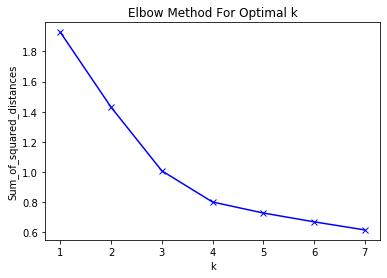

In [33]:
# Visualise the Elbow Method diagram

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [34]:
# From the diagram, we set the number of clusters

kclusters = 3

# k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Edmonton_grouped_clustering)

# Verify cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [35]:
# Add cluster labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Edm_cluster = Edm_merge

# Merge Edmonton_grouped with 'Edm_merge' dataframe to add latitude/longitude for each neighbourhood
Edm_cluster = Edm_cluster.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

#Drop row with missing cluster values
Edm_cluster=Edm_cluster.dropna(subset=['Cluster Labels'])
Edm_cluster['Cluster Labels'] = Edm_cluster['Cluster Labels'].astype(int)

Edm_cluster.head()

,Neighbourhood,Latitude,Longitude,Crime Frequency,Population density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crestwood,53.535434,-113.569038,566,2012.570511,1,Grocery Store,Supermarket,High School,Light Rail Station,College Academic Building,Student Center,Hospital,Pharmacy,Big Box Store,College Administrative Building
1,Parkview,53.524060,-113.567914,564,2124.222397,1,Grocery Store,Supermarket,High School,Light Rail Station,College Academic Building,Student Center,Hospital,Big Box Store,Pharmacy,College Administrative Building
2,Rhatigan Ridge,53.474506,-113.587569,194,2289.302486,1,Grocery Store,High School,College Academic Building,Student Center,Hospital,Light Rail Station,Big Box Store,Supermarket,Pharmacy,College Residence Hall
3,Elmwood,53.515738,-113.605993,426,2652.240173,1,Grocery Store,High School,Hospital,College Academic Building,Student Center,Light Rail Station,Big Box Store,Supermarket,College Administrative Building,Pharmacy
4,Kenilworth,53.521633,-113.431042,690,2223.058958,1,Grocery Store,Light Rail Station,Supermarket,College Academic Building,Student Center,Big Box Store,Hospital,High School,College Administrative Building,College Residence Hall


In [36]:
# Generate new map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Designate color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Edm_cluster['Latitude'], Edm_cluster['Longitude'], Edm_cluster['Neighbourhood'], Edm_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Findings from the Clusters

### Cluster 0

Neighborhoods in Cluster 0 have mostly grocey shops, and supermarkets in the environs. They also have easy access transit and bus stations as well as hospitals. Schools are less relatively less visible in this neighborhoods

In [37]:
Edm_cluster.loc[Edm_cluster['Cluster Labels'] == 0, Edm_cluster.columns]

,Neighbourhood,Latitude,Longitude,Crime Frequency,Population density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Brintnell,53.621394,-113.407114,676,4598.590465,0,Supermarket,Grocery Store,Big Box Store,Pharmacy,High School,Trade School,Recreation Center,College Engineering Building,Light Rail Station,Hospital
15,Overlanders,53.581011,-113.388176,653,3491.447214,0,Grocery Store,High School,Supermarket,Light Rail Station,Big Box Store,Hospital,Community College,Pharmacy,Student Center,University
27,Elsinore,53.640763,-113.499402,246,2745.201752,0,Hospital,Supermarket,Grocery Store,Big Box Store,Light Rail Station,High School,Pharmacy,Trade School,Student Center,Recreation Center
30,Kernohan,53.589400,-113.380164,544,3356.961823,0,Grocery Store,Supermarket,Light Rail Station,Big Box Store,High School,Hospital,Community College,Pharmacy,University,Recreation Center
34,Abbottsfield,53.574143,-113.388758,976,4655.431186,0,Grocery Store,High School,Supermarket,Light Rail Station,Big Box Store,Hospital,Community College,Pharmacy,Trade School,Student Center
40,Ozerna,53.622275,-113.449024,362,3920.292277,0,Supermarket,Light Rail Station,Grocery Store,Big Box Store,Hospital,Pharmacy,Community College,University,High School,Medical School
43,Klarvatten,53.637224,-113.476665,584,3458.527047,0,Supermarket,Grocery Store,Light Rail Station,Big Box Store,Hospital,Recreation Center,Pharmacy,College Administrative Building,College Engineering Building,College Hockey Rink
47,Baturyn,53.630980,-113.504339,736,3497.322582,0,Supermarket,Grocery Store,Light Rail Station,Hospital,Big Box Store,College Administrative Building,College Engineering Building,College Gym,High School,Community College
50,Lorelei,53.624593,-113.504466,771,3385.756603,0,Light Rail Station,Supermarket,Grocery Store,Hospital,Big Box Store,College Administrative Building,Community College,University,College Gym,Pharmacy
58,Hollick-Kenyon,53.622244,-113.422288,652,4001.379058,0,Supermarket,Grocery Store,Big Box Store,Pharmacy,Light Rail Station,Trade School,Recreation Center,College Engineering Building,Hospital,College & University


### Cluster 1

Neighborhoods in Cluster 1 also have lots of grocey shops but not supermarkets. Hospitals are much common in this cluster than transit stations. Like cluster 1, Schools are less relatively accessible in these neighborhoods.

In [38]:
Edm_cluster.loc[Edm_cluster['Cluster Labels'] == 1, Edm_cluster.columns]

,Neighbourhood,Latitude,Longitude,Crime Frequency,Population density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crestwood,53.535434,-113.569038,566,2012.570511,1,Grocery Store,Supermarket,High School,Light Rail Station,College Academic Building,Student Center,Hospital,Pharmacy,Big Box Store,College Administrative Building
1,Parkview,53.524060,-113.567914,564,2124.222397,1,Grocery Store,Supermarket,High School,Light Rail Station,College Academic Building,Student Center,Hospital,Big Box Store,Pharmacy,College Administrative Building
2,Rhatigan Ridge,53.474506,-113.587569,194,2289.302486,1,Grocery Store,High School,College Academic Building,Student Center,Hospital,Light Rail Station,Big Box Store,Supermarket,Pharmacy,College Residence Hall
3,Elmwood,53.515738,-113.605993,426,2652.240173,1,Grocery Store,High School,Hospital,College Academic Building,Student Center,Light Rail Station,Big Box Store,Supermarket,College Administrative Building,Pharmacy
4,Kenilworth,53.521633,-113.431042,690,2223.058958,1,Grocery Store,Light Rail Station,Supermarket,College Academic Building,Student Center,Big Box Store,Hospital,High School,College Administrative Building,College Residence Hall
7,Alberta Avenue,53.568485,-113.485119,5048,4019.707318,1,Grocery Store,Supermarket,Light Rail Station,Hospital,College Academic Building,High School,Student Center,Big Box Store,College Administrative Building,Pharmacy
9,La Perle,53.533088,-113.640709,950,3629.809601,1,Grocery Store,Student Center,High School,College Academic Building,Hospital,Light Rail Station,Supermarket,College Administrative Building,College Residence Hall,University
10,Rundle Heights,53.563221,-113.391922,1197,4137.247568,1,Grocery Store,Student Center,Supermarket,College Academic Building,High School,Hospital,Big Box Store,Light Rail Station,College Residence Hall,University
11,Tawa,53.461933,-113.427712,622,3057.246359,1,Grocery Store,Student Center,College Academic Building,Big Box Store,Supermarket,High School,Light Rail Station,Pharmacy,College Residence Hall,Hospital
13,Downtown,53.539767,-113.499421,11741,5529.034635,1,Grocery Store,Supermarket,Light Rail Station,Hospital,College Academic Building,High School,Big Box Store,Student Center,College Administrative Building,University


### Cluster 2

Neighborhoods in Cluster 2 have lots of grocey as well as schools relative to the other clusters. Similar to cluster 1 Hospitals are much common. Transit stations are mostly the 3rd most common venues in this cluster. 

In [39]:
Edm_cluster.loc[Edm_cluster['Cluster Labels'] == 2, Edm_cluster.columns]

,Neighbourhood,Latitude,Longitude,Crime Frequency,Population density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Evergreen,53.632277,-113.350484,246,2291.914267,2,Grocery Store,High School,Big Box Store,Hospital,Light Rail Station,Medical School,Community College,Pharmacy,Student Center,Supermarket
8,Crawford Plains,53.441837,-113.406216,678,3798.353142,2,Grocery Store,High School,Hospital,Big Box Store,Pharmacy,Supermarket,Light Rail Station,College Academic Building,College Administrative Building,College Bookstore
12,Westview Village,53.552222,-113.696668,350,2331.135487,2,Grocery Store,High School,Hospital,Pharmacy,Big Box Store,Supermarket,Light Rail Station,Factory,College Administrative Building,Mini Golf
14,Menisa,53.442070,-113.447375,438,2933.117835,2,Grocery Store,High School,Big Box Store,Supermarket,Pharmacy,College Academic Building,College Rec Center,Fraternity House,College Gym,Hospital
20,Daly Grove,53.449537,-113.400727,680,3625.503767,2,Grocery Store,High School,Hospital,Big Box Store,Pharmacy,Supermarket,Trade School,Student Center,College Academic Building,College Classroom
22,Silver Berry,53.461159,-113.381406,907,4163.315992,2,Grocery Store,High School,Pharmacy,Big Box Store,Supermarket,Hospital,Trade School,Student Center,College Academic Building,General College & University
24,Blackmud Creek,53.419661,-113.510788,291,3539.342995,2,Grocery Store,High School,Hospital,Big Box Store,Pharmacy,Supermarket,Light Rail Station,College Gym,College Bookstore,College Stadium
29,Rutherford,53.416765,-113.529788,898,4819.207644,2,Grocery Store,Hospital,High School,Pharmacy,Big Box Store,Light Rail Station,Trade School,Supermarket,College Gym,College Stadium
32,Weinlos,53.459907,-113.413836,497,3608.148039,2,Grocery Store,High School,Supermarket,Big Box Store,Fraternity House,Pharmacy,College Residence Hall,Hospital,General College & University,College Academic Building
42,Laurel,53.445799,-113.381470,548,2516.072813,2,Grocery Store,Big Box Store,Supermarket,High School,Pharmacy,Hospital,College Classroom,General College & University,Medical Center,Medical School


## Ranking the Neighbourhoods

In [40]:
# Generate unique venues to assign ranks for neighbourhoods

pd.unique(neighbourhoods_venues_sorted.iloc[:,2:].values.ravel('K'))

array(['Grocery Store', 'High School', 'Supermarket',
       'Light Rail Station', 'Big Box Store', 'Hospital',
       'Community College', 'Pharmacy', 'Trade School', 'Student Center',
       'College Academic Building', 'College Administrative Building',
       'College Residence Hall', 'Recreation Center',
       'College Engineering Building', 'General College & University',
       'University', 'College Gym', 'Fraternity House',
       'College Science Building', 'College Classroom',
       'College Bookstore', 'College Stadium', 'Mini Golf',
       'Medical School', 'College Lab', 'College Library',
       'College & University', 'College Hockey Rink', 'Medical Center',
       'College Rec Center', 'College Arts Building', 'Factory'],
      dtype=object)

In [41]:
# Generate a dataframe of scores of the amenities or venues to make it easily readable

# Replace School amenities with score 1
neighbourhoods_venues_sorted = neighbourhoods_venues_sorted.replace(['Community College', 'High School','College Academic Building', 'Medical School',\
'University', 'College Administrative Building', 'College Gym','General College & University', 'College Cafeteria','College Lab'\
'College Library', 'Trade School', 'College & University','College Classroom', 'Student Center', 'College Arts Building','College Hockey Rink'\
'College Bookstore', 'College Residence Hall','College Stadium', 'Fraternity House', 'College Rec Center',\
'College Science Building', 'College Engineering Building','College Bookstore','College Lab',\
'College Hockey Rink', 'College Library', ], 1)

# Replace Hospitals amenities with score 2
neighbourhoods_venues_sorted = neighbourhoods_venues_sorted.replace(['Hospital','Pharmacy','Medical Center'], 2)

# Replace Recreational center amenities with score 3
neighbourhoods_venues_sorted = neighbourhoods_venues_sorted.replace(['Recreation Center','Mini Golf'], 3)

# Replace Grocey and Supermarket amenities with score 4
neighbourhoods_venues_sorted = neighbourhoods_venues_sorted.replace(['Grocery Store','Supermarket','Big Box Store'], 4)

# Replace Transit station amenities with score 5
neighbourhoods_venues_sorted = neighbourhoods_venues_sorted.replace('Light Rail Station', 5)

# Replace Transit station amenities with score 6
neighbourhoods_venues_sorted = neighbourhoods_venues_sorted.replace('Factory', 6)






# Preview the first 5 rows of the dataframe
neighbourhoods_venues_sorted.head(250)

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Abbottsfield,4,1,4,5,4,2,1,2,1,1
1,1,Alberta Avenue,4,4,5,2,1,1,1,4,1,2
2,1,Aldergrove,4,1,1,1,2,4,1,5,4,1
3,1,Allendale,4,2,5,1,1,1,4,4,1,1
4,1,Argyll,4,4,2,1,1,5,4,1,1,1
5,1,Aspen Gardens,4,1,2,1,5,1,4,4,1,2
6,1,Athlone,4,4,5,2,1,1,1,4,1,2
7,1,Avonmore,4,4,2,1,1,5,4,1,1,1
8,1,Balwin,4,4,5,1,1,2,1,4,1,1
9,0,Bannerman,4,4,4,5,2,1,3,2,1,1


In [42]:
# Browse the object types of the dataframe. If any of the 1st to 10th Most Common Venue shows an object 
# such as a string, this must be corrected before applying the weights as shown below

neighbourhoods_venues_sorted.dtypes

Cluster Labels             int32
Neighbourhood             object
1st Most Common Venue      int64
2nd Most Common Venue      int64
3rd Most Common Venue      int64
4th Most Common Venue      int64
5th Most Common Venue      int64
6th Most Common Venue      int64
7th Most Common Venue      int64
8th Most Common Venue      int64
9th Most Common Venue      int64
10th Most Common Venue     int64
dtype: object

In [43]:
# I assign weights between 0 and 1 for the amenities based on popularity or frequency.

neighbourhoods_venues_sorted['1st Most Common Venue']*=1
neighbourhoods_venues_sorted['2nd Most Common Venue']*=0.9
neighbourhoods_venues_sorted['3rd Most Common Venue']*=0.8
neighbourhoods_venues_sorted['4th Most Common Venue']*=0.7
neighbourhoods_venues_sorted['5th Most Common Venue']*=0.6
neighbourhoods_venues_sorted['6th Most Common Venue']*=0.5
neighbourhoods_venues_sorted['7th Most Common Venue']*=0.4
neighbourhoods_venues_sorted['8th Most Common Venue']*=0.3
neighbourhoods_venues_sorted['9th Most Common Venue']*=0.2
neighbourhoods_venues_sorted['10th Most Common Venue']*=0.1
neighbourhoods_venues_sorted.head()

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Abbottsfield,4,0.9,3.2,3.5,2.4,1.0,0.4,0.6,0.2,0.1
1,1,Alberta Avenue,4,3.6,4.0,1.4,0.6,0.5,0.4,1.2,0.2,0.2
2,1,Aldergrove,4,0.9,0.8,0.7,1.2,2.0,0.4,1.5,0.8,0.1
3,1,Allendale,4,1.8,4.0,0.7,0.6,0.5,1.6,1.2,0.2,0.1
4,1,Argyll,4,3.6,1.6,0.7,0.6,2.5,1.6,0.3,0.2,0.1


In [44]:
# Now we merge the crime data frame on using the common 'Neighbourhood' variable

Edm_scores = pd.merge(Edm_merge, neighbourhoods_venues_sorted, on='Neighbourhood')

In [47]:
# Preview the first few rows of the dataframe

Edm_scores.head()

,Neighbourhood,Latitude,Longitude,Crime Frequency,Population density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crestwood,53.535434,-113.569038,566,2012.570511,1,4,3.6,0.8,3.5,0.6,0.5,0.8,0.6,0.8,0.1
1,Parkview,53.524060,-113.567914,564,2124.222397,1,4,3.6,0.8,3.5,0.6,0.5,0.8,1.2,0.4,0.1
2,Rhatigan Ridge,53.474506,-113.587569,194,2289.302486,1,4,0.9,0.8,0.7,1.2,2.5,1.6,1.2,0.4,0.1
3,Elmwood,53.515738,-113.605993,426,2652.240173,1,4,0.9,1.6,0.7,0.6,2.5,1.6,1.2,0.2,0.2
4,Kenilworth,53.521633,-113.431042,690,2223.058958,1,4,4.5,3.2,0.7,0.6,2.0,0.8,0.3,0.2,0.1


In [48]:
# Also we even out the weight of crimes by multiplying the inverse of 'Crimes' by 50.

Edm_scores['Crime Frequency'] = 1/Edm_scores['Crime Frequency']*50 

In [49]:
# Preview the first few rows of the dataframe

Edm_scores.head()

,Neighbourhood,Latitude,Longitude,Crime Frequency,Population density,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crestwood,53.535434,-113.569038,0.088339,2012.570511,1,4,3.6,0.8,3.5,0.6,0.5,0.8,0.6,0.8,0.1
1,Parkview,53.524060,-113.567914,0.088652,2124.222397,1,4,3.6,0.8,3.5,0.6,0.5,0.8,1.2,0.4,0.1
2,Rhatigan Ridge,53.474506,-113.587569,0.257732,2289.302486,1,4,0.9,0.8,0.7,1.2,2.5,1.6,1.2,0.4,0.1
3,Elmwood,53.515738,-113.605993,0.117371,2652.240173,1,4,0.9,1.6,0.7,0.6,2.5,1.6,1.2,0.2,0.2
4,Kenilworth,53.521633,-113.431042,0.072464,2223.058958,1,4,4.5,3.2,0.7,0.6,2.0,0.8,0.3,0.2,0.1


In [50]:
# At this point we can drop some of the variables which are not of focus from the dataframe

Edm_scores.drop(Edm_scores[['Latitude','Longitude', 'Population density']], axis=1, inplace=True)

In [51]:
# Preview the first few rows of the dataframe

Edm_scores.head()

,Neighbourhood,Crime Frequency,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crestwood,0.088339,1,4,3.6,0.8,3.5,0.6,0.5,0.8,0.6,0.8,0.1
1,Parkview,0.088652,1,4,3.6,0.8,3.5,0.6,0.5,0.8,1.2,0.4,0.1
2,Rhatigan Ridge,0.257732,1,4,0.9,0.8,0.7,1.2,2.5,1.6,1.2,0.4,0.1
3,Elmwood,0.117371,1,4,0.9,1.6,0.7,0.6,2.5,1.6,1.2,0.2,0.2
4,Kenilworth,0.072464,1,4,4.5,3.2,0.7,0.6,2.0,0.8,0.3,0.2,0.1


### Reorganize the dataframe

We move the Cluster Label variable to the second column and have the Neighbourhoods, weighted crime rates and popular amenities in sequence.

In [52]:
# Move Cluster Lables varible to the second column

second_column = Edm_scores.pop('Cluster Labels')
Edm_scores.insert(1, 'Cluster Labels',second_column)

# Generate the score rating for each neighbourhood by summing up the weighted scores
Edm_scores['Score']=Edm_scores.iloc[:,2:].sum(axis=1)

# Sort by descending rder with regards to the rated scores for each neighbourhood
Edm_scores = Edm_scores.sort_values(by=['Score'], ascending = False)



In [56]:
# Preview the first few rows 
Edm_scores.head(207)

,Neighbourhood,Cluster Labels,Crime Frequency,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Score
43,Klarvatten,0,0.085616,4,3.6,4.0,2.8,1.2,1.5,0.8,0.3,0.2,0.1,18.585616
70,Kirkness,0,0.069061,4,3.6,3.2,3.5,1.2,0.5,1.2,0.6,0.2,0.1,18.169061
74,Bannerman,0,0.062972,4,3.6,3.2,3.5,1.2,0.5,1.2,0.6,0.2,0.1,18.162972
77,Lago Lindo,0,0.093985,4,3.6,1.6,3.5,2.4,1.5,0.8,0.3,0.2,0.1,18.093985
195,Miller,0,0.087873,4,3.6,4.0,2.8,1.2,1.0,0.4,0.3,0.6,0.1,18.087873
83,Casselman,0,0.060241,4,3.6,4.0,2.8,1.2,1.0,0.4,0.3,0.2,0.3,17.860241
40,Ozerna,0,0.138122,4,4.5,3.2,2.8,1.2,1.0,0.4,0.3,0.2,0.1,17.838122
58,Hollick-Kenyon,0,0.076687,4,3.6,3.2,1.4,3.0,0.5,1.2,0.3,0.4,0.1,17.776687
65,Matt Berry,0,0.130548,4,3.6,4.0,2.8,1.2,1.0,0.4,0.3,0.2,0.1,17.730548
171,Mayliewan,0,0.126582,4,3.6,4.0,1.4,2.4,1.0,0.4,0.3,0.2,0.3,17.726582
